# Handwritten digit classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the handwritten digit dataset from keras package

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Viewing above image

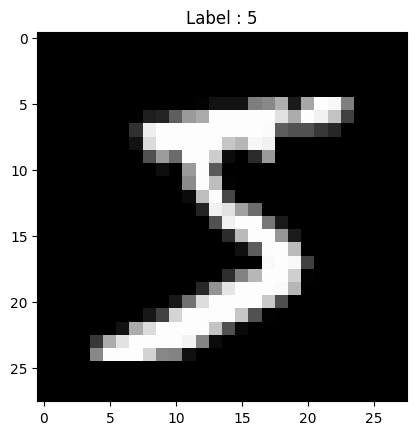

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.title(f'Label : {ytrain[0]}')
plt.show()

In [11]:
ytrain[0]

5

### Showing top 9 images from xtrain along with labels

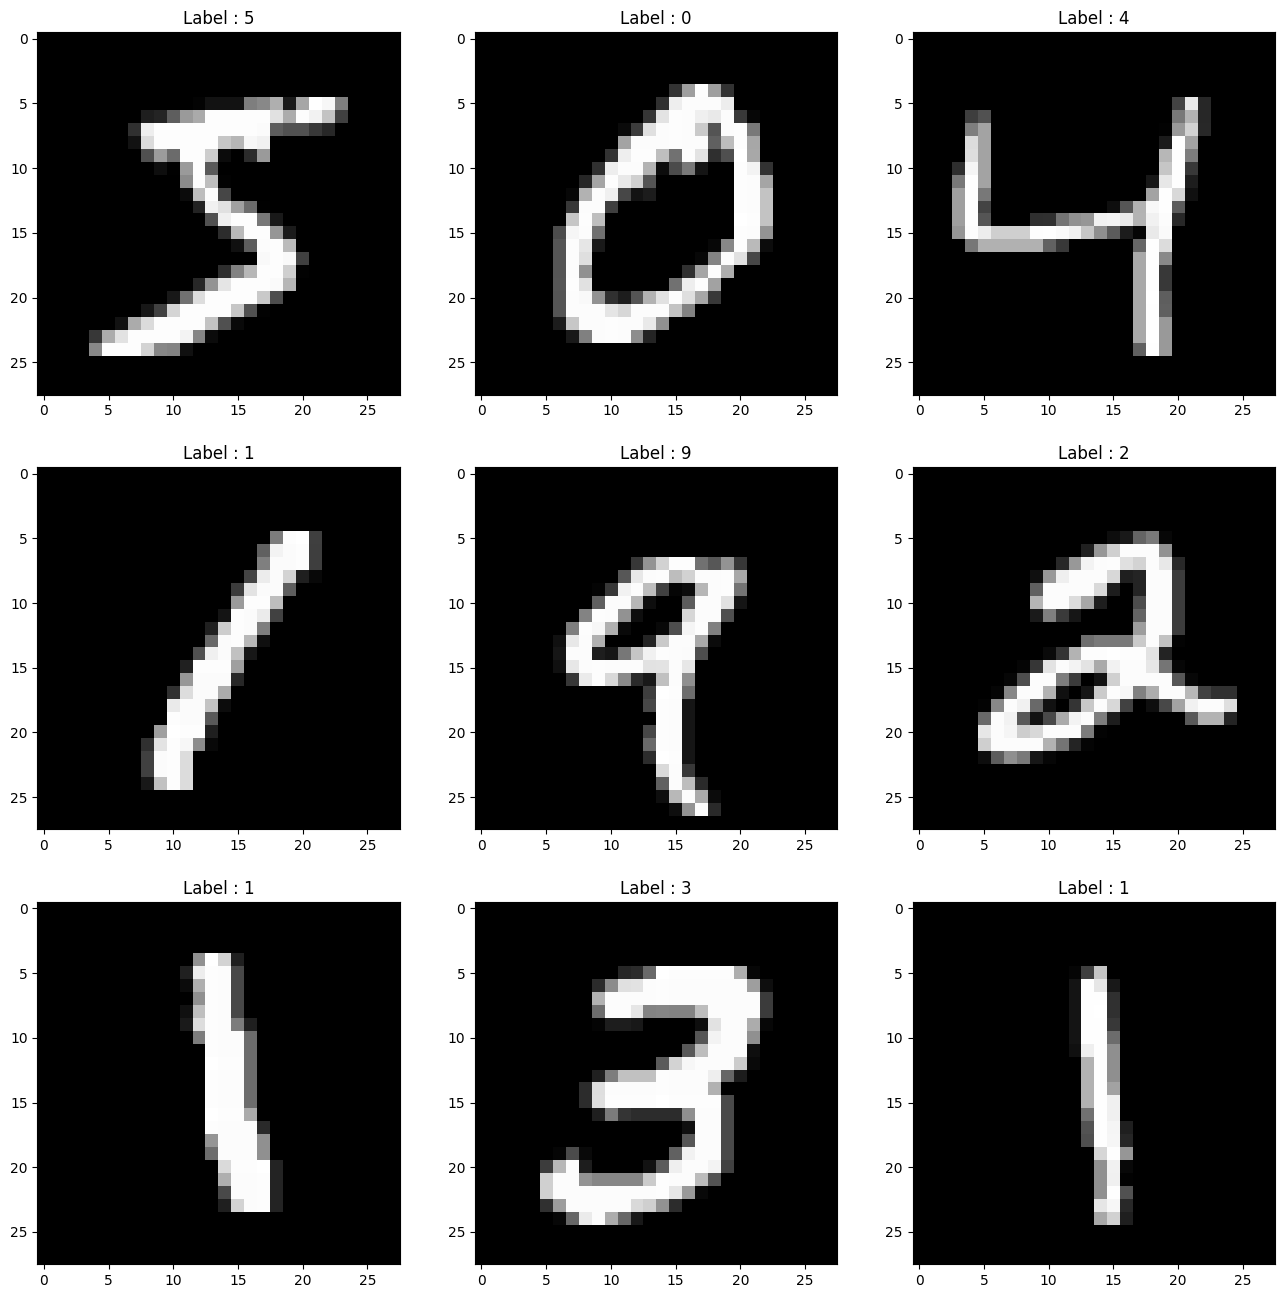

In [12]:
plt.figure(figsize=(16,16))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Label : {ytrain[i]}')
plt.show()

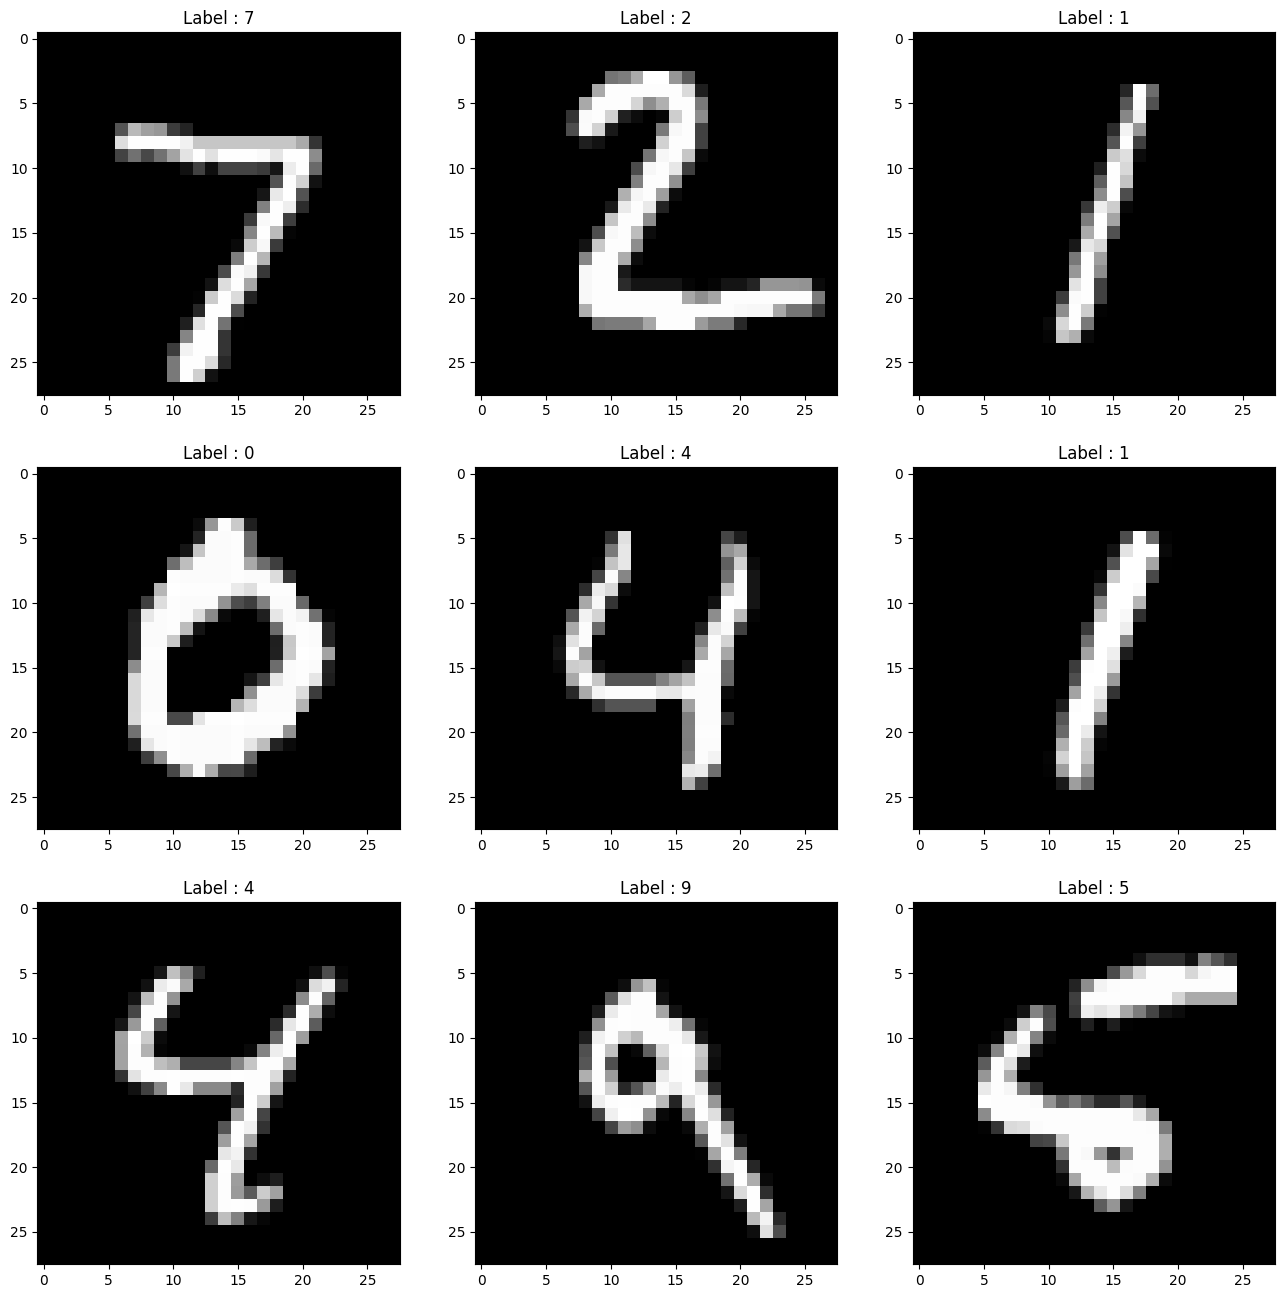

In [13]:
plt.figure(figsize=(16,16))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtest[i], cmap='gray')
    plt.title(f'Label : {ytest[i]}')
plt.show()

### Visualizaing image from seaborn

In [14]:
xtest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
import seaborn as sns

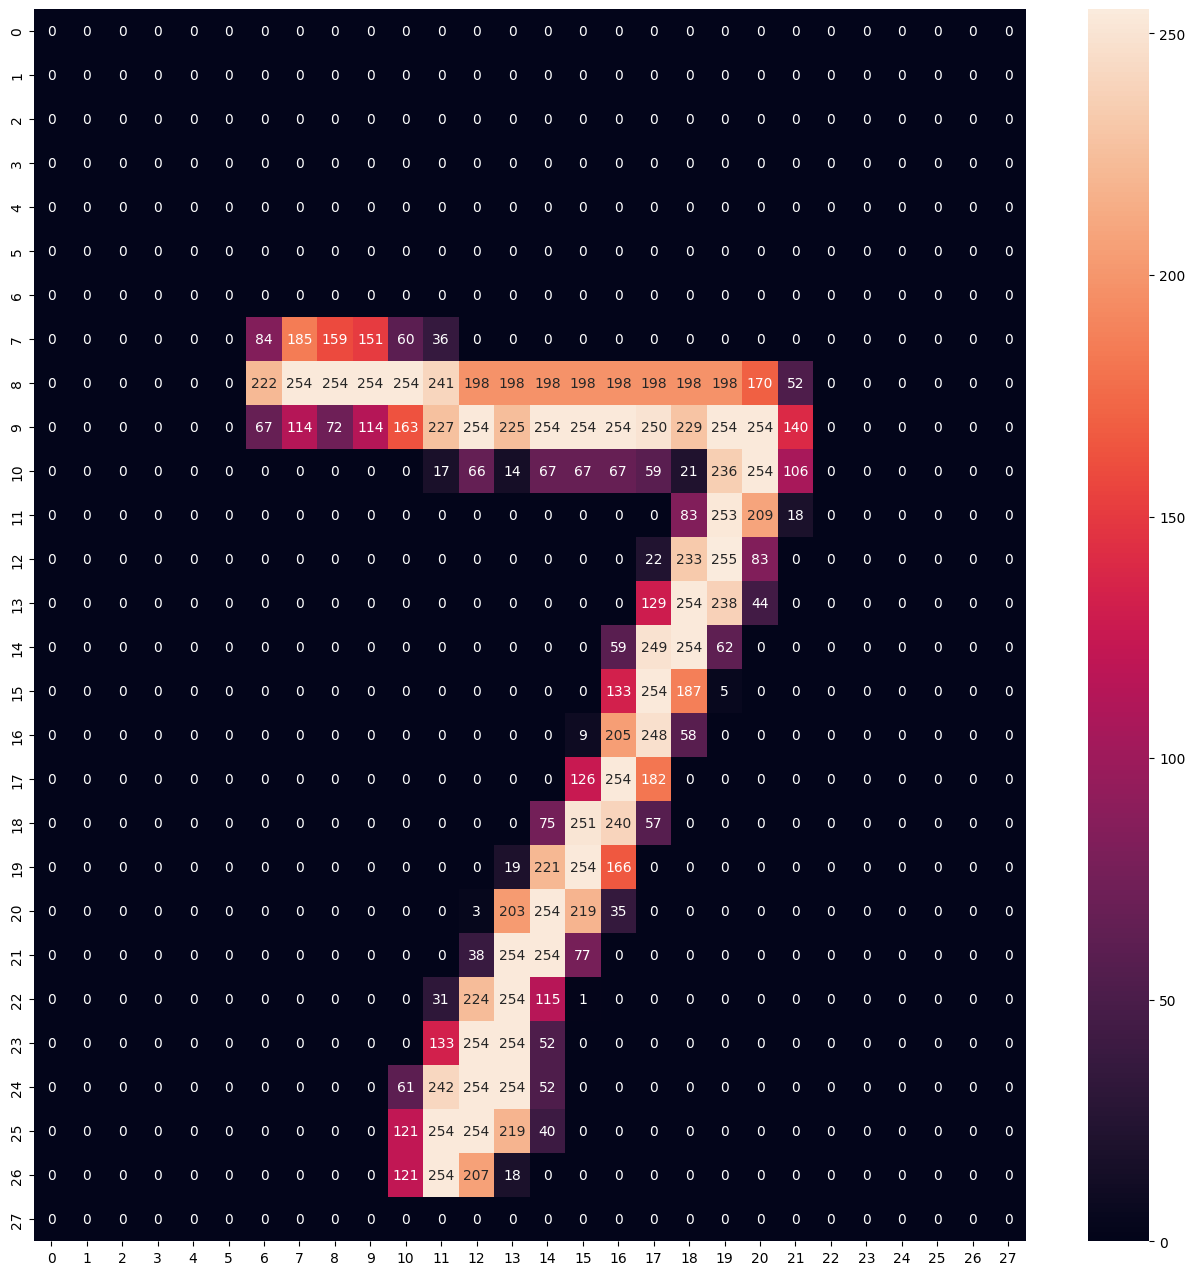

In [16]:
plt.figure(figsize=(16, 16))
sns.heatmap(xtest[0], annot=True, fmt='d')
plt.show()

### Preprocess the image
Image pixel belong from 0 - 255

divide data by 255 to scale images values from 0-1

In [17]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255

In [18]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [21]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
ytrain_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Build the CNN (Convolutional Neural Network)

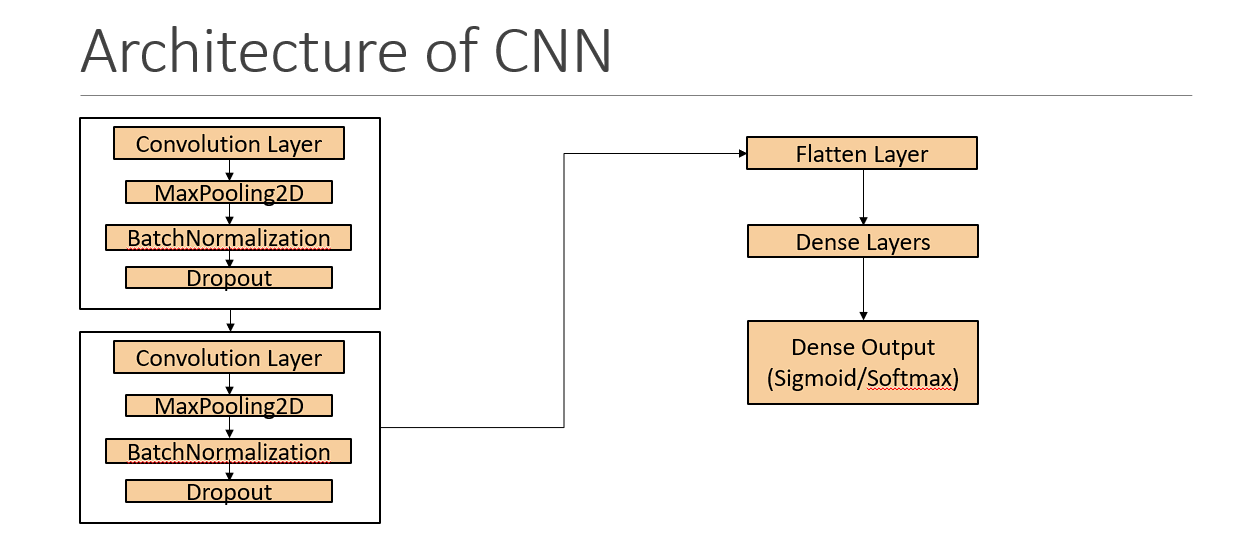

In [24]:
xtrain.shape

(60000, 28, 28)

In [25]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

In [26]:
model = Sequential()

# First convlution Layer 
model.add(Convolution2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Convolutional Layer
model.add(Convolution2D(filters=16, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Flatten Layer
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [30]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=100, callbacks=[early_stop])

Epoch 1/100
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2141 - accuracy: 0.9331 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 2/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0842 - accuracy: 0.9732 - val_loss: 0.0579 - val_accuracy: 0.9824
Epoch 3/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0638 - accuracy: 0.9794 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 4/100
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.0405 - val_accuracy: 0.9881
Epoch 5/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 6/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0492 - val_accuracy: 0.9868
Epoch 7/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0471 

### Plot the learning curve

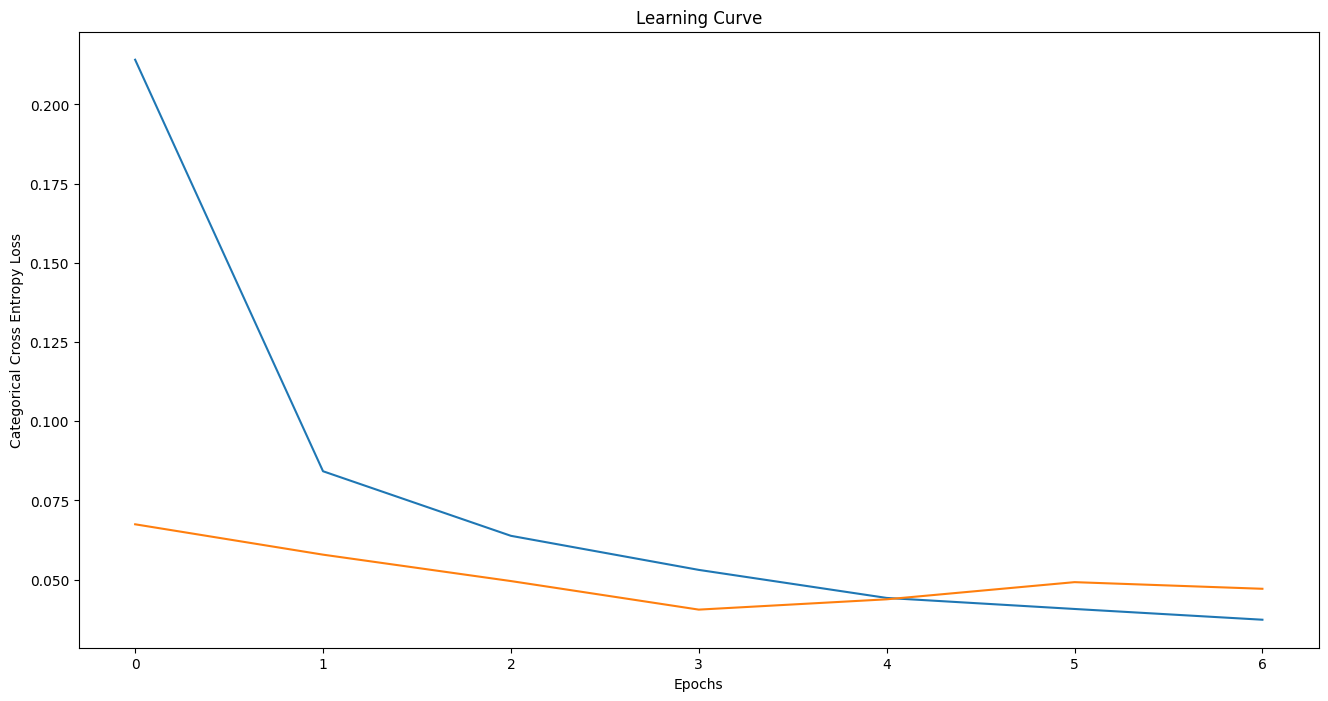

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.show()

### Evaluating the model

In [32]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9931


[0.022812383249402046, 0.9931333065032959]

In [33]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9897


[0.03698917105793953, 0.9897000193595886]

### Predicting the image labels

In [34]:
yprob_tr = model.predict(xtrain_scl)
yprob_tr[0:5]

1875/1875 [==============================] - 4s 2ms/step


array([[1.71721890e-11, 3.01197190e-07, 4.22272173e-09, 5.16801258e-04,
        9.18340599e-13, 9.99482632e-01, 2.62398214e-10, 1.84109616e-10,
        8.22217672e-09, 2.83940921e-07],
       [1.00000000e+00, 7.77428035e-12, 2.21120431e-11, 2.08968612e-13,
        5.12023899e-16, 1.49799295e-13, 3.78923470e-09, 4.40168762e-13,
        1.19316926e-11, 1.09560985e-10],
       [1.10590367e-12, 6.13815354e-09, 4.32495639e-08, 3.15067915e-12,
        9.99999166e-01, 8.42814046e-14, 1.23679645e-13, 4.28427199e-07,
        8.99018531e-08, 3.21646496e-07],
       [3.82087672e-13, 1.00000000e+00, 2.57902684e-12, 1.66469132e-15,
        1.37359998e-10, 1.39995505e-13, 5.43450864e-13, 2.39406051e-09,
        4.06540634e-11, 4.76510463e-11],
       [2.11538325e-08, 3.46140752e-08, 4.22817538e-06, 4.34677713e-06,
        3.11741431e-04, 9.81686208e-06, 1.05022258e-09, 3.85414496e-05,
        5.86433134e-06, 9.99625444e-01]], dtype=float32)

In [35]:
yprob_tr[0]

array([1.7172189e-11, 3.0119719e-07, 4.2227217e-09, 5.1680126e-04,
       9.1834060e-13, 9.9948263e-01, 2.6239821e-10, 1.8410962e-10,
       8.2221767e-09, 2.8394092e-07], dtype=float32)

In [36]:
ypred_tr = np.argmax(yprob_tr, axis=-1)

In [37]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [39]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [40]:
yprob_ts = model.predict(xtest_scl)
yprob_ts[0:5]

313/313 [==============================] - 1s 2ms/step


array([[3.8207144e-09, 4.3906505e-07, 1.7562586e-08, 2.5127413e-08,
        4.2333581e-09, 9.7692725e-09, 2.3309649e-11, 9.9999928e-01,
        3.7971324e-09, 1.8657417e-07],
       [2.3359680e-12, 1.1951566e-07, 9.9999988e-01, 3.4038087e-12,
        1.9357147e-15, 1.7246987e-13, 5.1060611e-11, 1.2036683e-10,
        2.8740382e-10, 6.8261767e-15],
       [4.5199140e-12, 1.0000000e+00, 6.2248567e-11, 2.5291701e-14,
        4.8884286e-10, 6.6847673e-12, 5.4195981e-11, 3.3160080e-10,
        2.2143538e-10, 2.0942970e-11],
       [9.9997342e-01, 7.0366838e-07, 7.7611372e-07, 1.1334273e-06,
        2.6530714e-07, 2.7003837e-06, 9.7653656e-06, 2.2069680e-07,
        5.0627051e-07, 1.0597059e-05],
       [1.6020681e-10, 3.6903036e-10, 5.3133586e-10, 2.7610184e-13,
        9.9999642e-01, 1.2452956e-13, 1.0871000e-11, 1.7720581e-08,
        2.2231038e-08, 3.5553674e-06]], dtype=float32)

In [41]:
ypred_ts = np.argmax(yprob_ts, axis=-1)
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [42]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot confusion matrix

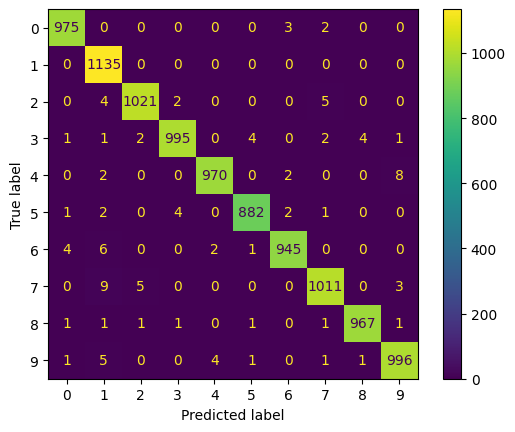

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [44]:
len(ytest)

10000

### Print classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Saving the model for future use

In [46]:
model.save('HandwrittenModel.keras')

### Loading the model for another notebooks

In [47]:
from keras.models import load_model
nn = load_model('HandwrittenModel.keras')

In [48]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0